# Evaluación función 2 (bivariada)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

Definición f2:

In [4]:
def f2(x1, x2):
    term1 = 0.75 * np.exp(-((9 * x1 - 2)**2 / 4) - ((9 * x2 - 2)**2 / 4))
    term2 = 0.75 * np.exp(-((9 * x1 + 1)**2 / 49) - ((9 * x2 + 1)**2 / 10))
    term3 = 0.5 * np.exp(-((9 * x1 - 7)**2 / 4) - ((9 * x2 - 3)**2 / 4))
    term4 = -0.2 * np.exp(-((9 * x1 - 7)**2 / 4) - ((9 * x2 - 3)**2 / 4))
    
    return term1 + term2 + term3 + term4

Visualización de la función:

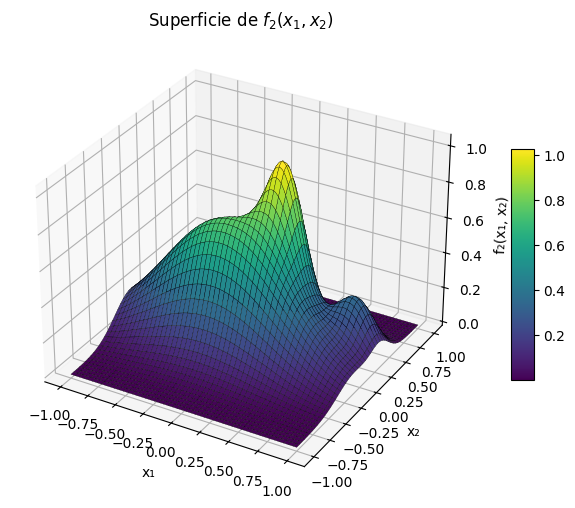

In [20]:
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x, y)
Z = f2(X, Y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', linewidth=0.2, antialiased=True)

ax.set_title("Superficie de $f_2(x_1, x_2)$")
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("f₂(x₁, x₂)")
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

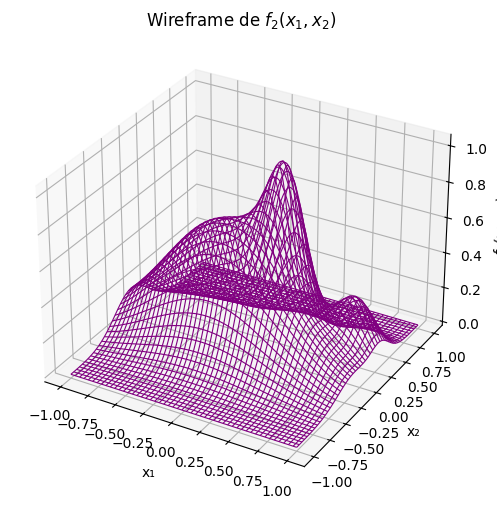

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, Z, color='purple', linewidth=0.8)

ax.set_title("Wireframe de $f_2(x_1, x_2)$")
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("f₂(x₁, x₂)")
plt.show()

### Observaciones sobre la función a considerar:
Tiene varios picos gausianos centrados en diferentes ubicaciones, lo que genera zonas de alta variación local (difíciles de capturar con interpolación global).

## 1) Nodos Equiespaciados:

Espacio:

In [5]:
n_points = 20
x_eq = np.linspace(-1, 1, n_points)
y_eq = np.linspace(-1, 1, n_points)
x1_eq, x2_eq = np.meshgrid(x_eq, y_eq)
z_eq = f2(x1_eq, x2_eq)

# Puntos de evaluación INTERMEDIOS (que no coincidan con los NODOS)
puntosIntermedios = np.linspace(-1, 1, 500)
x1_inter, x2_inter = np.meshgrid(puntosIntermedios, puntosIntermedios)
z_inter = f2(x1_inter, x2_inter)

points = np.array([x1_eq.flatten(), x2_eq.flatten()]).T
values = z_eq.flatten()
grid_x, grid_y = np.mgrid[-1:1:500j, -1:1:500j]

Interpolaciones:

In [6]:
z_linear_interpol = griddata(points, values, (grid_x, grid_y), method='linear')
z_cubic_interpol = griddata(points, values, (grid_x, grid_y), method='cubic')

Visualizaciones gráficas:

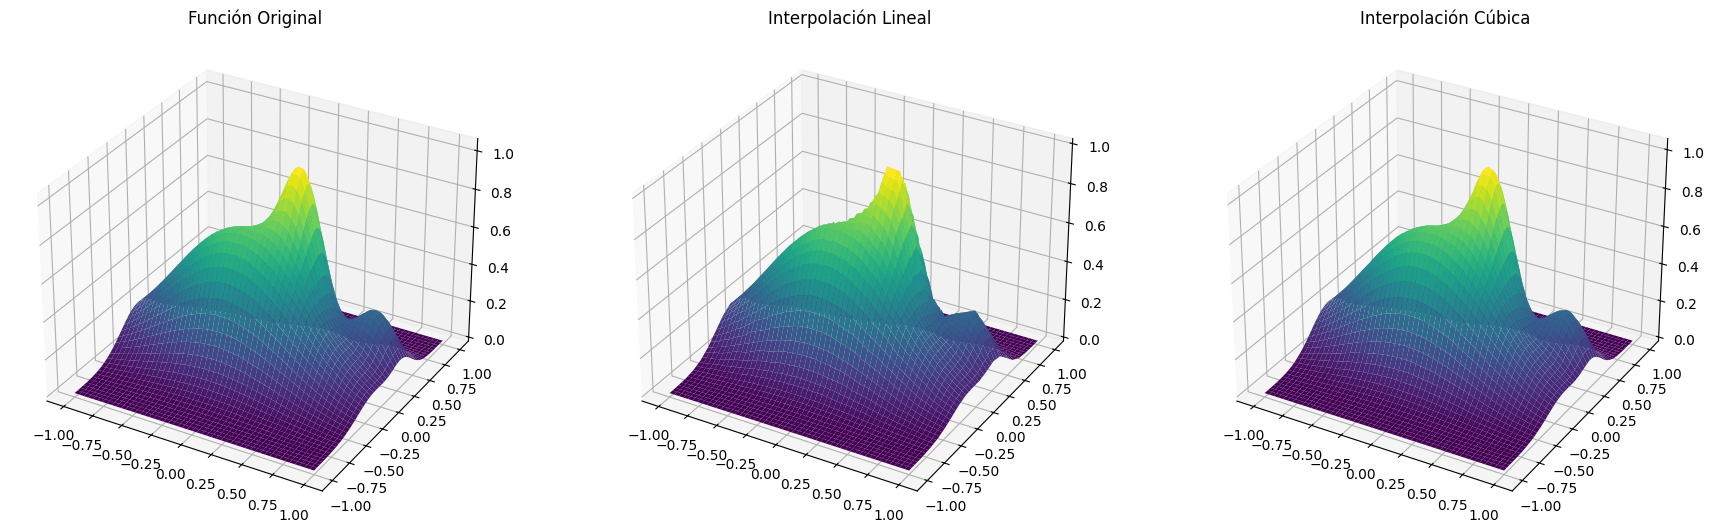

In [7]:
""" GRÁFICOS 3D """
fig = plt.figure(figsize=(18, 6))

# f2
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x1_inter, x2_inter, z_inter, cmap='viridis')
ax1.set_title('Función Original')
pos1 = ax1.get_position()
ax1.set_position([pos1.x0 + 0.1, pos1.y0, pos1.width, pos1.height]) 

# lineal
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(grid_x, grid_y, z_linear_interpol, cmap='viridis')
ax2.set_title('Interpolación Lineal')
pos2 = ax2.get_position()
ax2.set_position([pos2.x0 + 0.05, pos2.y0, pos2.width, pos2.height])  # Mover 5 píxeles a la izquierda


# cúbica
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(grid_x, grid_y, z_cubic_interpol, cmap='viridis')
ax3.set_title('Interpolación Cúbica')
pos3 = ax3.get_position()
ax3.set_position([pos3.x0 + 0.05, pos3.y0, pos3.width, pos3.height])  # Mover 5 píxeles a la izquierda


plt.tight_layout()
plt.show()

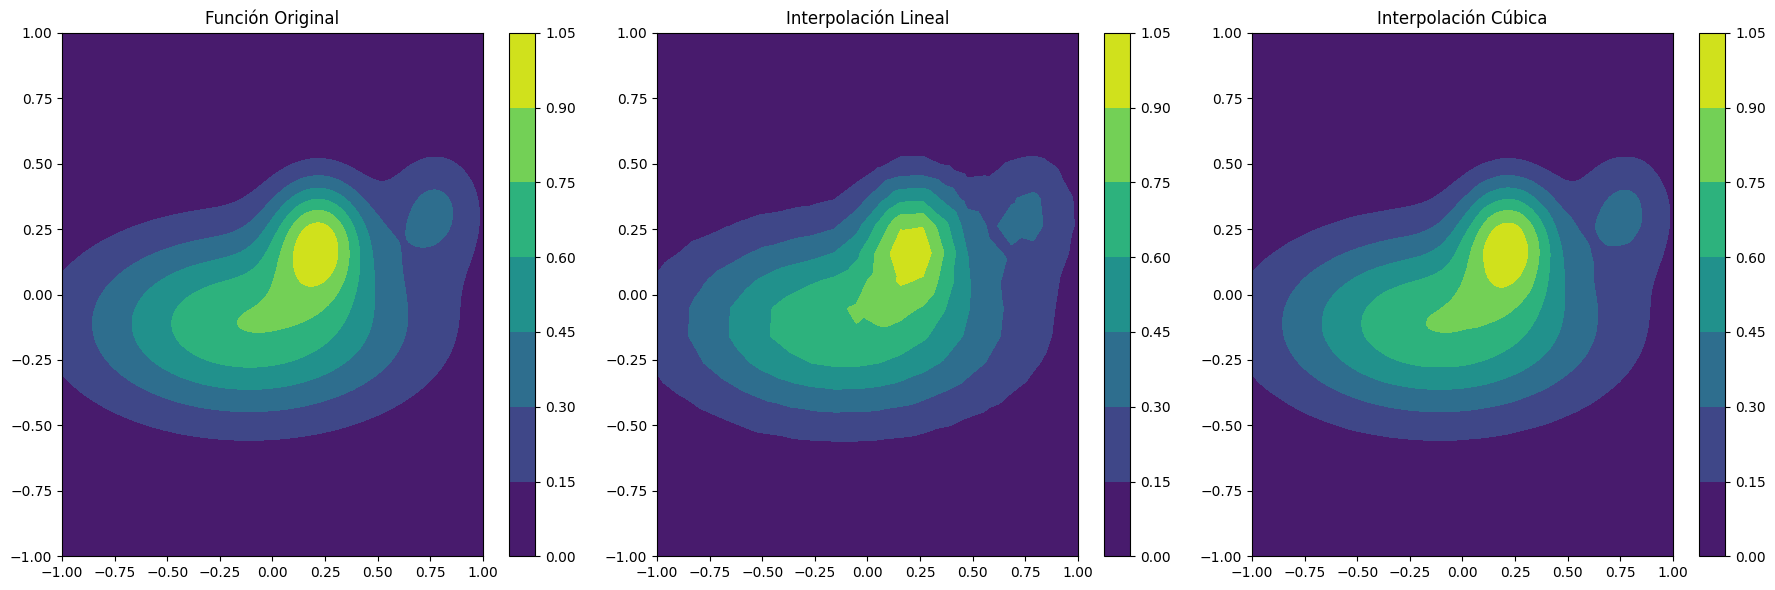

In [8]:
""" GRÁFICOS CURVAS DE NIVEL"""
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1) # f2
plt.contourf(x1_inter, x2_inter, z_inter, cmap='viridis')
plt.title('Función Original')
plt.colorbar()

plt.subplot(1, 3, 2) # lineal
plt.contourf(grid_x, grid_y, z_linear_interpol, cmap='viridis')
plt.title('Interpolación Lineal')
plt.colorbar()

plt.subplot(1, 3, 3) # cúbica
plt.contourf(grid_x, grid_y, z_cubic_interpol, cmap='viridis')
plt.title('Interpolación Cúbica')
plt.colorbar()

plt.tight_layout()
plt.show()

Cálculo error:

In [9]:
error_abs_linear = np.abs(z_inter - z_linear_interpol)
error_abs_cubic = np.abs(z_inter - z_cubic_interpol)

error_linear = error_abs_linear / np.abs(z_inter)
error_cubic = error_abs_cubic / np.abs(z_inter)

In [10]:
#  nodos para evaluar ERROR
nodos = list(range(2, 100))

errores_lineal = []
errores_cubic = []

errores_lineal2 = []
errores_cubic2 = []

for n_points in nodos:
    x_eq = np.linspace(-1, 1, n_points)
    y_eq = np.linspace(-1, 1, n_points)
    x1_eq, x2_eq = np.meshgrid(x_eq, y_eq)
    z_eq = f2(x1_eq, x2_eq)
    
    points = np.array([x1_eq.flatten(), x2_eq.flatten()]).T
    values = z_eq.flatten()
    grid_x, grid_y = np.mgrid[-1:1:500j, -1:1:500j]
    
    z_linear_interpol = griddata(points, values, (grid_x, grid_y), method='linear')
    z_cubic_interpol = griddata(points, values, (grid_x, grid_y), method='cubic')
    
    error_linear = np.abs(z_inter - z_linear_interpol) 
    error_cubic = np.abs(z_inter - z_cubic_interpol) 
    
    errores_lineal.append(np.median(error_linear))
    errores_cubic.append(np.median(error_cubic))

    errores_lineal2.append(np.mean(error_linear))
    errores_cubic2.append(np.mean(error_cubic))


Visualizaciones del Error:

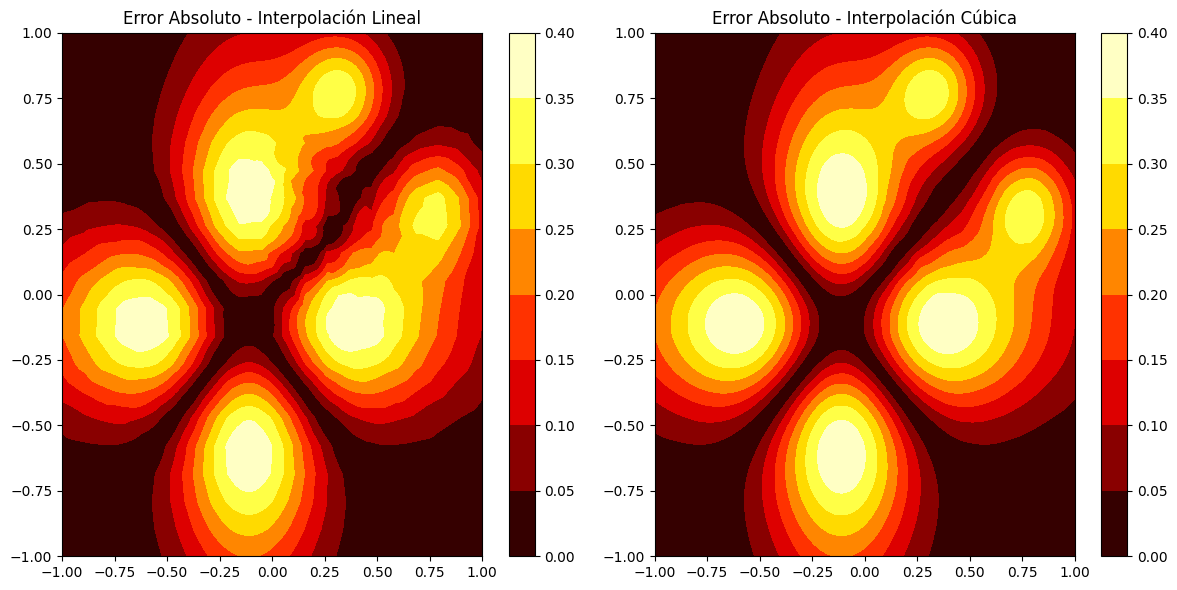

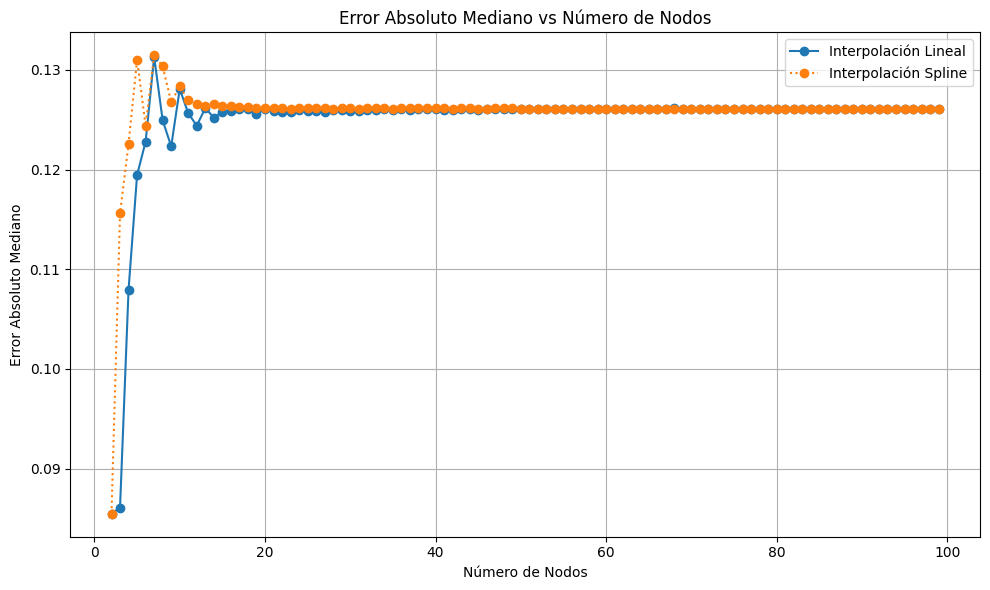

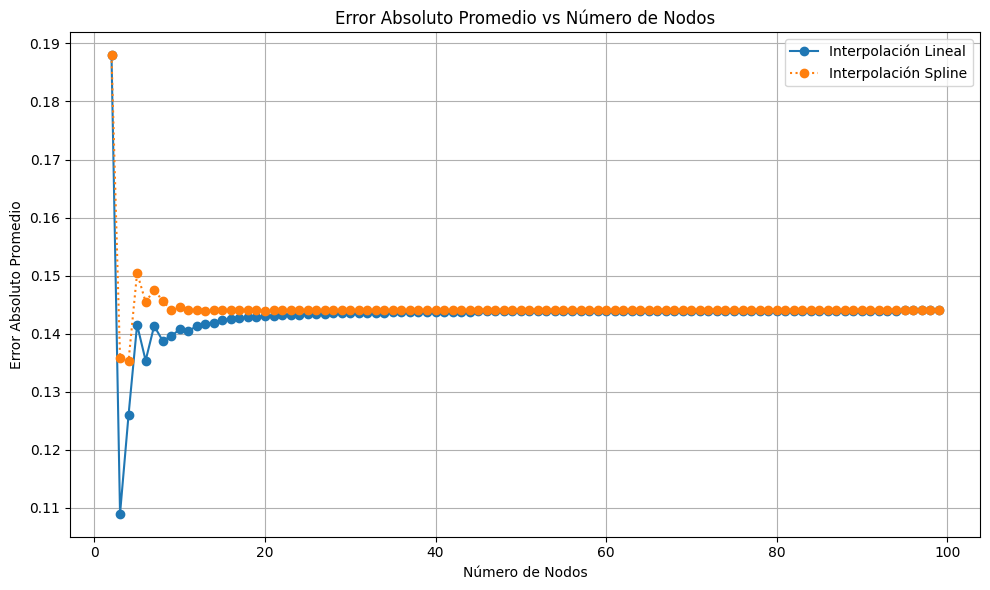

In [11]:
""" MAPAS DE CALOR CON ERRORES ABSOLUTOS """
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
plt.contourf(grid_x, grid_y, error_abs_linear, cmap='hot')
plt.title('Error Absoluto - Interpolación Lineal')
plt.colorbar()

plt.subplot(1, 2, 2) 
plt.contourf(grid_x, grid_y, error_abs_cubic, cmap='hot')
plt.title('Error Absoluto - Interpolación Cúbica')
plt.colorbar()

plt.tight_layout()
plt.show()

""" EVOLUCION MEDIANA ERROR ABS VS NODOS """
plt.figure(figsize=(10, 6))
plt.plot(nodos, errores_lineal, label='Interpolación Lineal', marker='o', linestyle='-')
plt.plot(nodos, errores_cubic, label='Interpolación Spline', marker='o', linestyle=':')
plt.xlabel('Número de Nodos')
plt.ylabel('Error Absoluto Mediano')
plt.title('Error Absoluto Mediano vs Número de Nodos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

""" EVOLUCION PROMEDIO ERROR ABS VS NODOS """
plt.figure(figsize=(10, 6))
plt.plot(nodos, errores_lineal2, label='Interpolación Lineal', marker='o', linestyle='-')
plt.plot(nodos, errores_cubic2, label='Interpolación Spline', marker='o', linestyle=':')
plt.xlabel('Número de Nodos')
plt.ylabel('Error Absoluto Promedio')
plt.title('Error Absoluto Promedio vs Número de Nodos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2) Nodos Chebyshev

Puntos:

In [12]:
n_points = 20
x_eq = np.linspace(-1, 1, n_points)
y_eq = np.linspace(-1, 1, n_points)
x1_eq, x2_eq = np.meshgrid(x_eq, y_eq)
z_eq = f2(x1_eq, x2_eq)

# Puntos de evaluación INTERMEDIOS (que no coincidan con los NODOS)
puntosIntermedios = np.linspace(-1, 1, 500)
x1_inter, x2_inter = np.meshgrid(puntosIntermedios, puntosIntermedios)
z_inter = f2(x1_inter, x2_inter)


points = np.array([x1_eq.flatten(), x2_eq.flatten()]).T
values = z_eq.flatten()
grid_x, grid_y = np.mgrid[-1:1:500j, -1:1:500j]

Interpolaciones:

In [13]:
z_linear_interpol = griddata(points, values, (grid_x, grid_y), method='linear')
z_cubic_interpol = griddata(points, values, (grid_x, grid_y), method='cubic')

Visualizaciones:

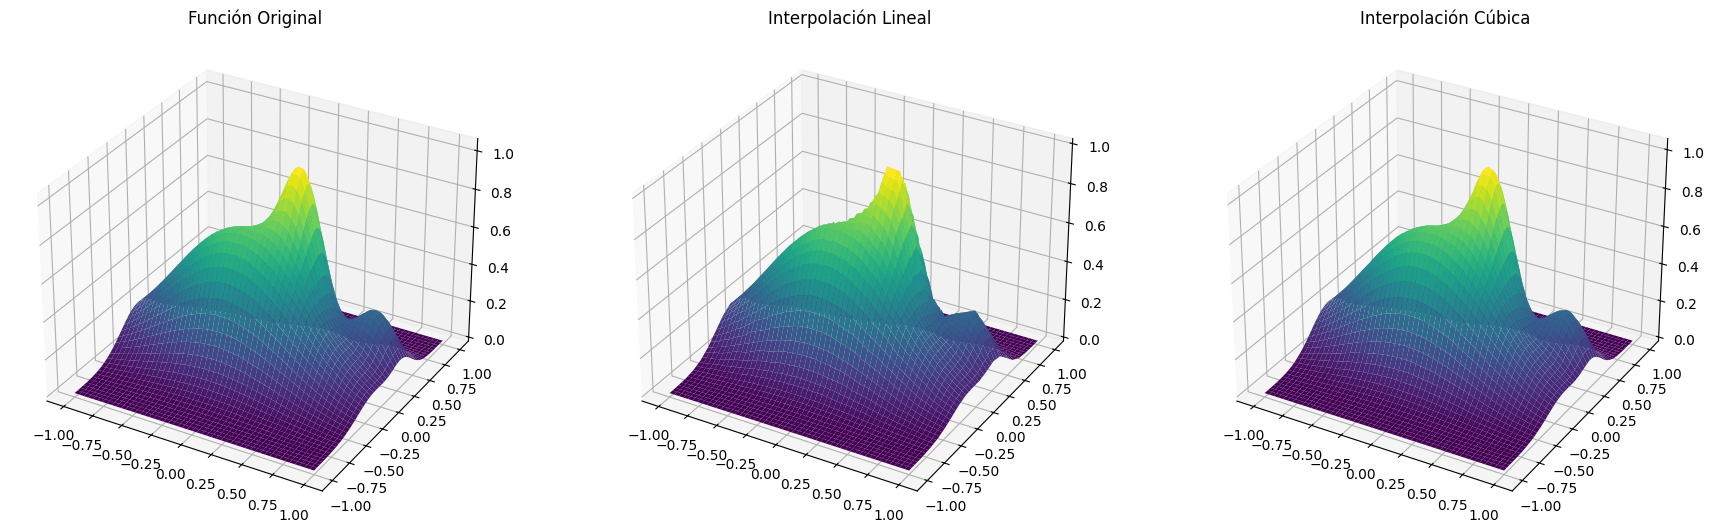

In [14]:
""" GRÁFICOS 3D """
fig = plt.figure(figsize=(18, 6))

# f2
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x1_inter, x2_inter, z_inter, cmap='viridis')
ax1.set_title('Función Original')
pos1 = ax1.get_position()
ax1.set_position([pos1.x0 + 0.1, pos1.y0, pos1.width, pos1.height]) 

# lineal
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(grid_x, grid_y, z_linear_interpol, cmap='viridis')
ax2.set_title('Interpolación Lineal')
pos2 = ax2.get_position()
ax2.set_position([pos2.x0 + 0.05, pos2.y0, pos2.width, pos2.height])  

# cúbica
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(grid_x, grid_y, z_cubic_interpol, cmap='viridis')
ax3.set_title('Interpolación Cúbica')
pos3 = ax3.get_position()
ax3.set_position([pos3.x0 + 0.05, pos3.y0, pos3.width, pos3.height])  

plt.tight_layout()
plt.show()

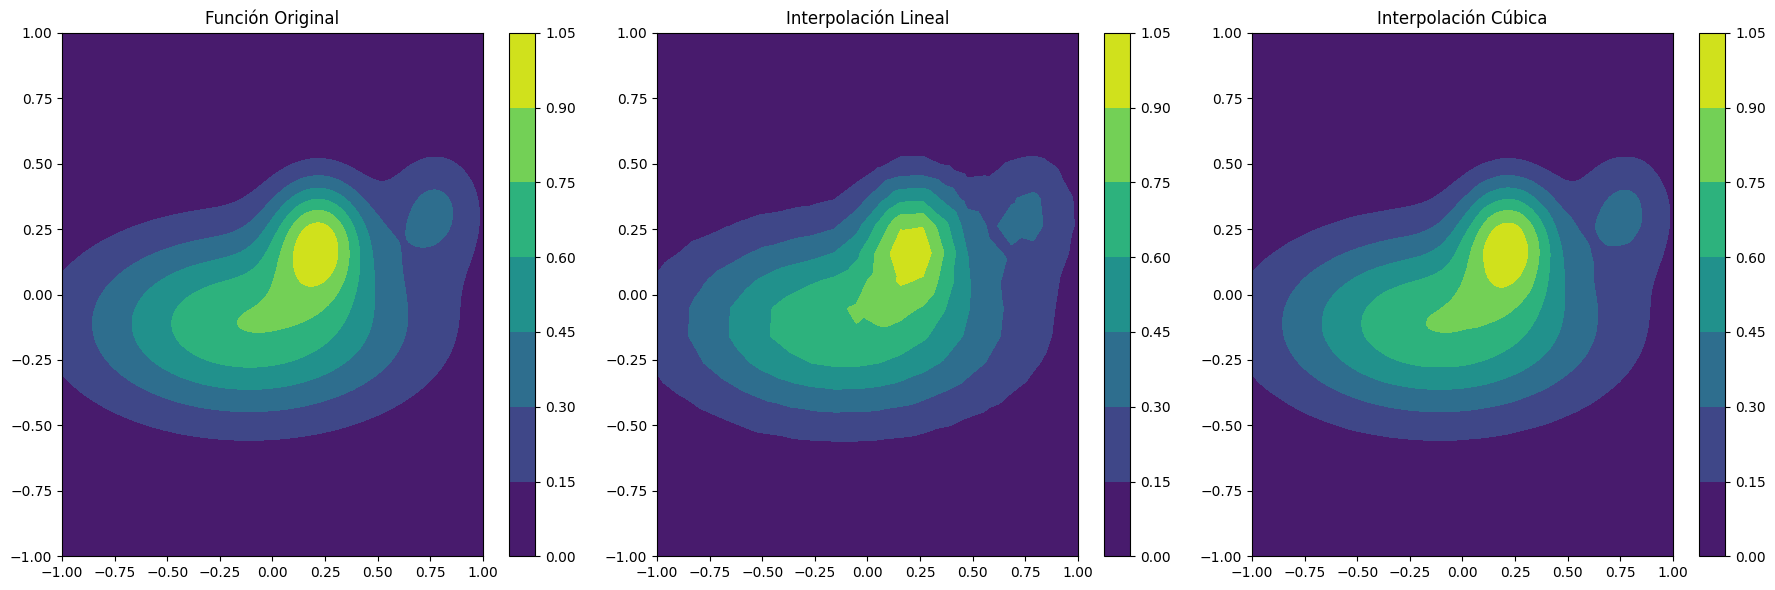

In [15]:
""" GRÁFICOS CURVAS DE NIVEL"""
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1) 
plt.contourf(x1_inter, x2_inter, z_inter, cmap='viridis')
plt.title('Función Original')
plt.colorbar()

plt.subplot(1, 3, 2) 
plt.contourf(grid_x, grid_y, z_linear_interpol, cmap='viridis')
plt.title('Interpolación Lineal')
plt.colorbar()

plt.subplot(1, 3, 3) 
plt.contourf(grid_x, grid_y, z_cubic_interpol, cmap='viridis')
plt.title('Interpolación Cúbica')
plt.colorbar()

plt.tight_layout()
plt.show()

Análisis error:

In [16]:
error_abs_linear = np.abs(z_inter - z_linear_interpol)
error_abs_cubic = np.abs(z_inter - z_cubic_interpol)

error_linear = error_abs_linear / np.abs(z_inter)
error_cubic = error_abs_cubic / np.abs(z_inter)

# Números de nodos a evaluar
nodos = list(range(2, 100))

errores_lineal = []
errores_cubic = []

errores_lineal2 = []
errores_cubic2 = []

for n_points in nodos:
    x_eq = np.linspace(-1, 1, n_points)
    y_eq = np.linspace(-1, 1, n_points)
    x1_eq, x2_eq = np.meshgrid(x_eq, y_eq)
    z_eq = f2(x1_eq, x2_eq)

    points = np.array([x1_eq.flatten(), x2_eq.flatten()]).T
    values = z_eq.flatten()
    grid_x, grid_y = np.mgrid[-1:1:500j, -1:1:500j]
    
    z_linear_interpol = griddata(points, values, (grid_x, grid_y), method='linear')
    z_cubic_interpol = griddata(points, values, (grid_x, grid_y), method='cubic')
    
    error_linear = np.abs(z_inter - z_linear_interpol) 
    error_cubic = np.abs(z_inter - z_cubic_interpol) 

    errores_lineal.append(np.median(error_linear))
    errores_cubic.append(np.median(error_cubic))

    errores_lineal2.append(np.mean(error_linear))
    errores_cubic2.append(np.mean(error_cubic))


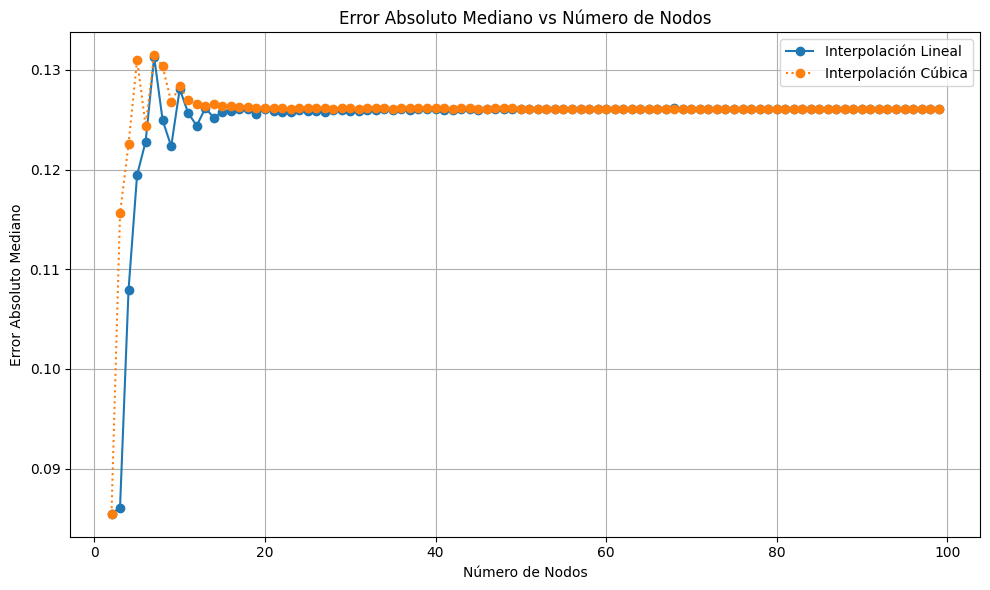

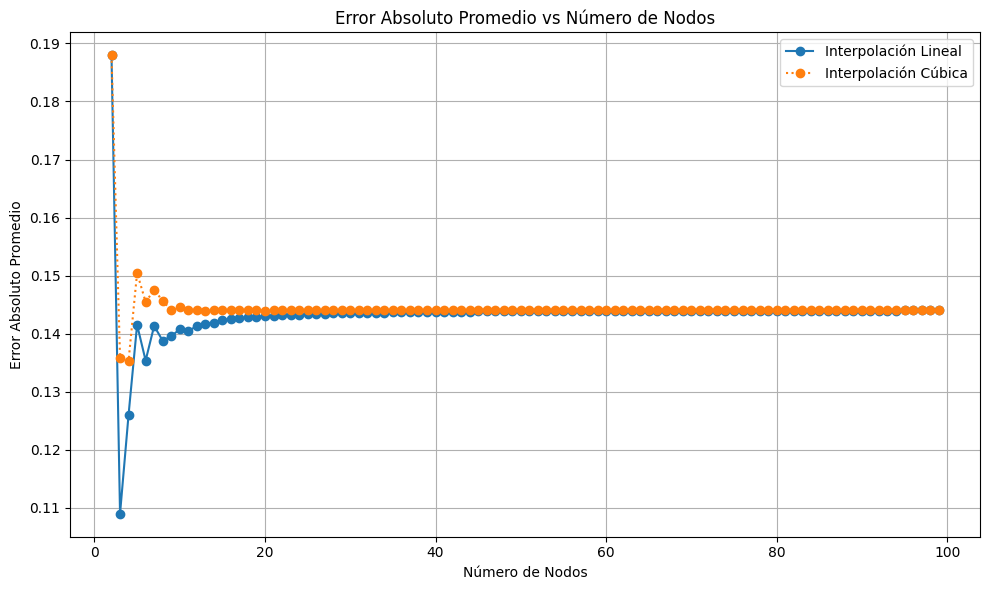

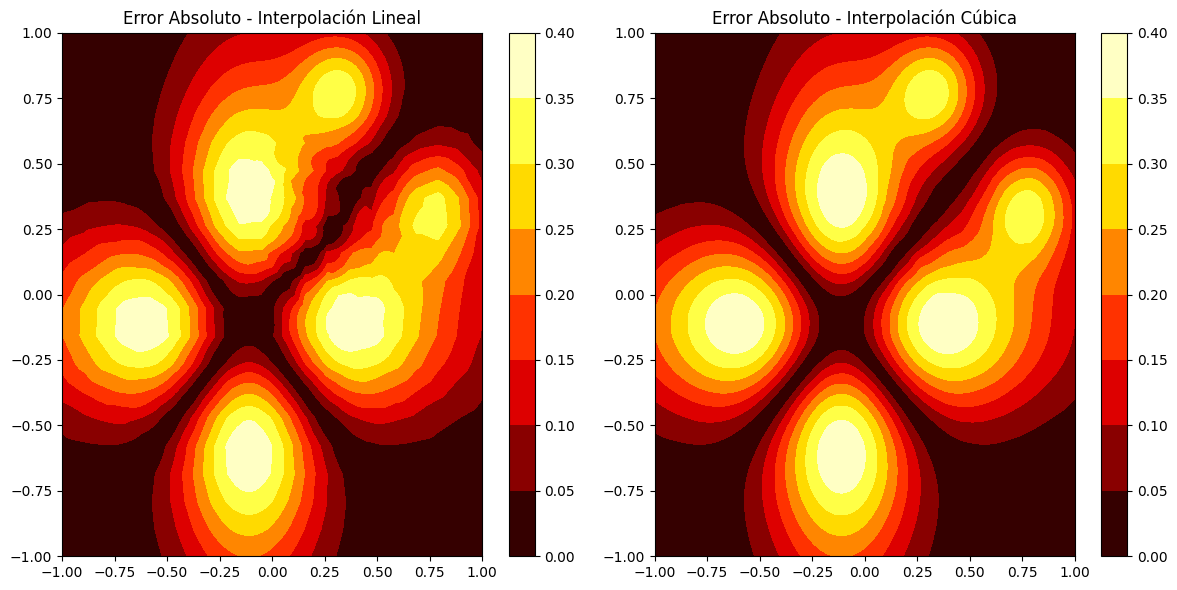

In [17]:
""" EVOLUCIÓN MEDIANA ERROR ABS VS NODOS """
plt.figure(figsize=(10, 6))
plt.plot(nodos, errores_lineal, label='Interpolación Lineal', marker='o', linestyle='-')
plt.plot(nodos, errores_cubic, label='Interpolación Cúbica', marker='o', linestyle=':')
plt.xlabel('Número de Nodos')
plt.ylabel('Error Absoluto Mediano')
plt.title('Error Absoluto Mediano vs Número de Nodos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

""" EVOLUCIÓN PROMEDIO ERROR ABS VS NODOS """
plt.figure(figsize=(10, 6))
plt.plot(nodos, errores_lineal2, label='Interpolación Lineal', marker='o', linestyle='-')
plt.plot(nodos, errores_cubic2, label='Interpolación Cúbica', marker='o', linestyle=':')
plt.xlabel('Número de Nodos')
plt.ylabel('Error Absoluto Promedio')
plt.title('Error Absoluto Promedio vs Número de Nodos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

""" MAPAS DE CALOR CON ERRORES ABSOLUTOS """
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
plt.contourf(grid_x, grid_y, error_abs_linear, cmap='hot')
plt.title('Error Absoluto - Interpolación Lineal')
plt.colorbar()

plt.subplot(1, 2, 2) 
plt.contourf(grid_x, grid_y, error_abs_cubic, cmap='hot')
plt.title('Error Absoluto - Interpolación Cúbica')
plt.colorbar()

plt.tight_layout()
plt.show()